In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.datasets import imdb
from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.tag import Kkma 
from konlpy.tag import Twitter
from pprint import pprint
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import glob
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)  # 단어 빈도수 상위 10000개 사용

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(np.unique(y_train))
print('카테고리 : {}'.format(num_classes))   # 이 경우에는 긍정을 의미하는 1의 값을 가집니다. 0은 부정

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [5]:
# 빈도수가 너무 낮거나 불용어들은 빠짐
print(X_train[0])
print(len(X_train[0]))  # 0 번째 인덱스 리뷰의 단어 수
print('\n')

print(X_train[1])
print(len(X_train[1]))    # 1 번째 인덱스 리뷰의 단어 수

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


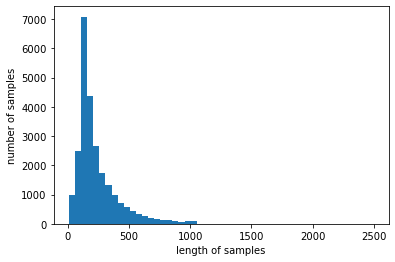

In [20]:
print('리뷰의 최대 길이 : {}'.format(max(len(sentence) for sentence in X_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))
# 위의 평균길이 코드 말고 np.mean([len(X_train[i]) for i in range(len(X_train))] )도 있음. 근데 위에꺼가 더 빠름

plt.hist([len(sentence) for sentence in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
word_to_index = imdb.get_word_index()    # 없으면 다운로드함

1646592/1641221 [==============================] - 0s 0us/step


In [28]:
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [29]:
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [30]:
index_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [33]:
print(index_to_word[1]) # 이건 'the'로 시작하는 문장
print(index_to_word[14])

the
as


In [11]:
# for없이 X_train[0]의 모든 문장 다 출력하기
# index_to_word[X] for X in X_train[0] 를 먼저 실행시켜서 단어들이 잘 나오는지 보기
# . 같은 것은 불용어라 다 빠짐
print(' '.join([index_to_word[X] for X in X_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [12]:
X_train_s = [' '.join([index_to_word[X] for X in X_train[i]]) 
             for i in range(len(X_train))  ]

X_test_s = [' '.join([index_to_word[X] for X in X_test[i]]) 
            for i in range(len(X_test))  ]

In [13]:
X_train_s[600]  # 600번째 리뷰

"the places and social i i was one life is seriously br highly views fact many should movie of and of jane did subsequently escapes to criminals disc \x96 was supposed strange light of directed end his form first as unlikely or sex in gang of you it cockney film walter love and or is time death guy moment see knew such of violence happen between finally should movie even then through some more then through some more vanessa also have what would role have vanessa car have to what would language have poor performances it br on son i i as you landscape time over being quickly to in at shooting was against laugh read has when giant to jr with irs moving any movie from he out is save br and weren't decent like ever family even scientist and an from people it critics to and unfortunately of problem on to what of decent tells passing were romeo no from people and of insights he used funniest has catches jane it's don't by br of decent help with cute and football mildred no poor never stinks w

---

###  단어 갯수 세기

In [14]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(X_train_s+X_test_s) 

# transform the training and test data using count vectorizer object
xtrain_count =  count_vect.transform(X_train_s)
xtest_count =  count_vect.transform(X_test_s)

In [15]:
print(xtrain_count.shape) # (전체 리뷰 갯수, 모든 리뷰들에 있는 단어의 총 갯수)
print(len(X_train[0]))  # 0번째 리뷰의 단어 갯수

(25000, 9774)
218


In [16]:
print(xtrain_count[0])

  (0, 138)	1
  (0, 224)	1
  (0, 312)	1
  (0, 456)	3
  (0, 463)	6
  (0, 523)	1
  (0, 527)	2
  (0, 597)	1
  (0, 632)	3
  (0, 676)	1
  (0, 681)	1
  (0, 829)	1
  (0, 893)	1
  (0, 1005)	1
  (0, 1069)	1
  (0, 1151)	2
  (0, 1299)	3
  (0, 1340)	1
  (0, 1529)	1
  (0, 1580)	1
  (0, 2171)	1
  (0, 2220)	1
  (0, 2668)	1
  (0, 3021)	1
  (0, 3114)	2
  :	:
  (0, 8766)	1
  (0, 8772)	2
  (0, 8779)	3
  (0, 8780)	1
  (0, 8792)	2
  (0, 8816)	1
  (0, 8889)	9
  (0, 9094)	2
  (0, 9173)	1
  (0, 9318)	1
  (0, 9382)	1
  (0, 9442)	1
  (0, 9466)	3
  (0, 9470)	1
  (0, 9475)	1
  (0, 9544)	1
  (0, 9550)	2
  (0, 9555)	1
  (0, 9557)	1
  (0, 9575)	1
  (0, 9593)	1
  (0, 9633)	11
  (0, 9655)	1
  (0, 9732)	1
  (0, 9744)	6


In [17]:
model = LinearSVC() # 위의 sparse matrix들 같은 경우 선형으로 분석하는게 대부분 # 단층 퍼셉트론보다 좋음
model.fit(xtrain_count, y_train)

C:\Users\student\.conda\envs\tt\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [18]:
y_pred = model.predict(xtest_count)
print(len(y_pred))
print(y_pred)
print('\n')

print('the accuracy is following as :')
sum((y_test == y_pred)*1) / len(y_pred)

25000
[0 1 1 ... 0 0 1]


the accuracy is following as :


0.83

---

### Judging the review(Positivity, Negativity)

In [19]:
# Ex1
text = "what the hell terrible story"
text_count = count_vect.transform([text])
y_pred = model.predict(text_count)
print(y_pred) # 1은 긍정, 0은 부정

[1]


In [20]:
# Ex2
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(X_train_s+X_test_s)
xtrain_tfidf =  tfidf_vect.transform(X_train_s)
xtest_tfidf =  tfidf_vect.transform(X_test_s)

In [21]:
model = LinearSVC()
model.fit(xtrain_tfidf, y_train)
y_pred = model.predict(xtest_tfidf)
sum((y_test == y_pred)*1) / 25000

0.87456

In [22]:
# Ex3
text = """
A fantastic combination of the two acting gods, Cho Seung-woo and Lee Byung-hun (excerpt)
  Insiders have become a representative film dealing with the stories behind politicians, entrepreneurs, and journalists, and in fact have given the bitterness of a similar series of events that have been unintentionally re-evaluated into reality. We don't want to believe that it's happening in our reality, whether it's an entrepreneur's sexual encounter with a politician, a financial back deal with a politician for the benefit of a entrepreneur, a journalist who manipulates them behind, or a journalist who incites lies to the public. While looking at the list of events, it provides an incredible reality. If you look at their own world with the feeling of observing people from other worlds, you may feel deprived and vulnerable on the one hand, but on the other hand, you may be lucky that you are not living in such a complicated life.
"""
text_count = count_vect.transform([text])
y_pred = model.predict(text_count)
print(y_pred) # 1은 긍정, 0은 부정

[1]
